Part 2: Qualitative Analysis
Create a presentation using Google Slides (max. 5 slides) using the data above (and additional data from those tables) that make clear recommendations on how people can create a successful Kickstarter campaign.

* **What's the best length of time to run a campaign?**

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from tools.helpers import read_json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
in_csv = 'data/input/DSI_kickstarterscrape_dataset.csv'

In [33]:
df = pd.read_csv(in_csv, encoding="ISO-8859-1")
# if need to convert back to utf-8 https://stackoverflow.com/questions/42456867/convert-pandas-dataframe-to-utf8

df = df.rename(columns=lambda x: x.replace(' ', '_'))
df['uid'] = df.index + 1

In [34]:
# filter outliers
from scipy import stats

dfs = df[['uid', 'funded_percentage']]

dff = dfs[(np.abs(stats.zscore(dfs)) < 3).all(axis=1)]

In [35]:
dff

,uid,funded_percentage
0,1,1.099524
1,2,0.005000
2,3,0.002800
3,4,1.089167
4,5,0.000000
...,...,...
45952,45953,1.202000
45953,45954,0.007500
45954,45955,1.000000
45955,45956,0.085695


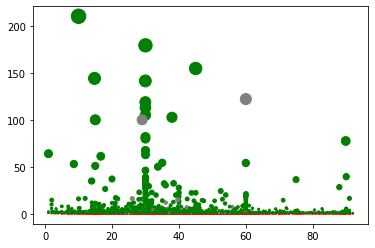

In [40]:
dfm = dff.merge(df.drop('funded_percentage', axis=1), how='left', on='uid')

colors = {'successful': 'green', 'failed': 'red', 'live': 'grey', 'canceled': 'orange', 'suspended': 'yellow'}

plt.scatter(dfm.duration, dfm.funded_percentage, s=dfm.funded_percentage, c=dfm['status'].apply(lambda x: colors[x]))

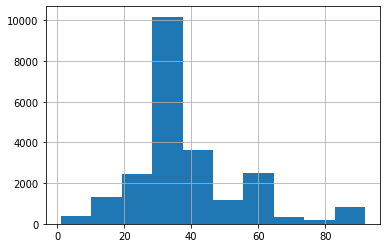

In [41]:
dfms = dfm[(dfm.status == 'successful')]

dfms.duration.hist()

In [54]:
dfmu = dfm[(dfm.status != 'successful') & (dfm.status != 'live')]

print(len(dfmu.index))

19059


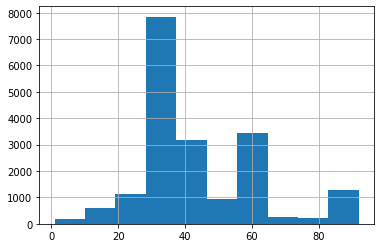

In [55]:
dfmu.duration.hist()